In [1]:
import torch

import sys
sys.path.append("../")

from tqdm import tqdm
import numpy as np

import scipy.stats as ss


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from simulationmodel import *

from sampling_utils import *


SMALL_SIZE = 16
MEDIUM_SIZE = 16
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:
dist_list = ['iid', 'invgamma', 'beta', 'bernoulli', 'horseshoe', 'gbfry', 'gbfry_heavy']
dist_name = {
    'iid': 'deterministic 1/p',
    'invgamma': 'Inverse Gamma',
    'beta': 'Beta',
    'bernoulli': 'Bernoulli',
    'horseshoe': "Horseshoe",
    'gbfry': r'Finite dim Generalized BFRY with $\tau=2$',
    'gbfry_heavy': r'Finite dim Generalized BFRY with $\tau=1$',
}


In [3]:
# Load samples
samples = np.load('samples_shallow_large.npy', allow_pickle=True).item()

## Plot the distribution of the output for the shallow FFNN with width = 2000

<ipython-input-5-aa6518d25b92>:39: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(6,6))


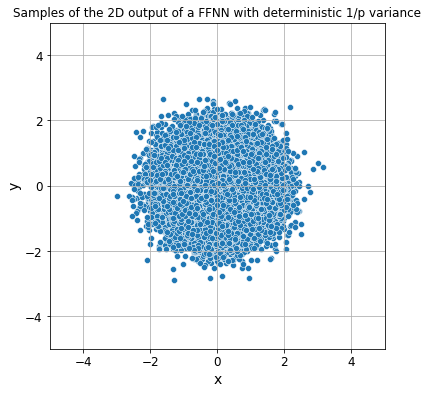

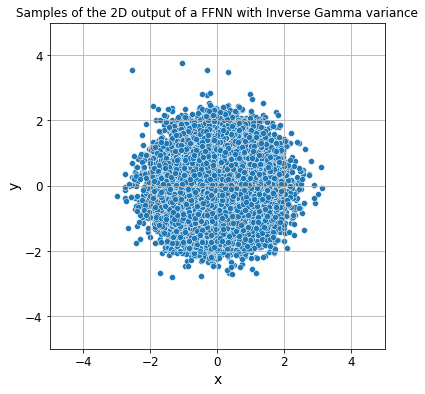

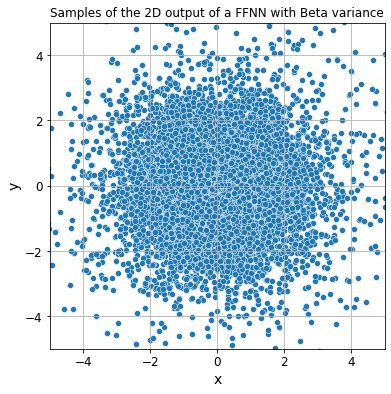

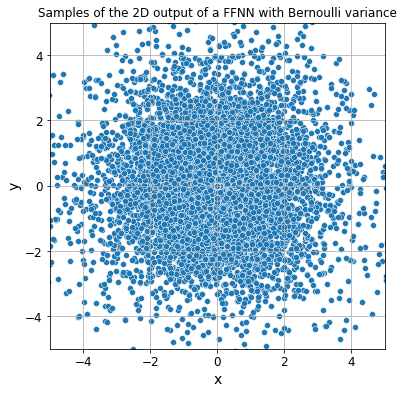

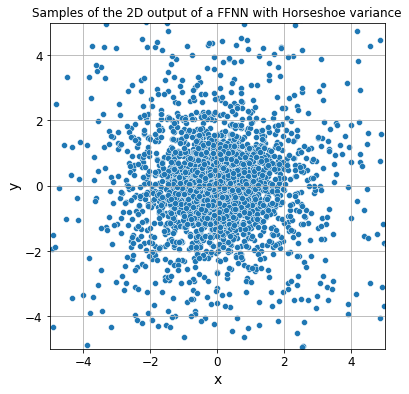

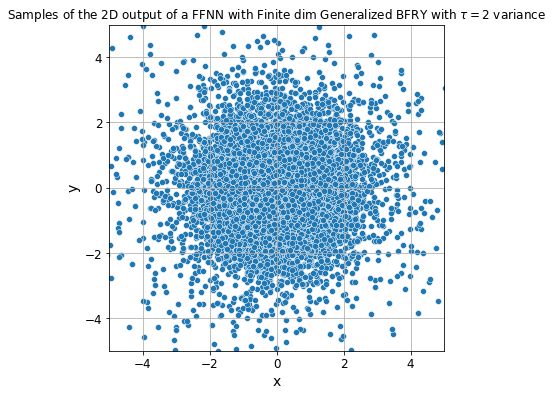

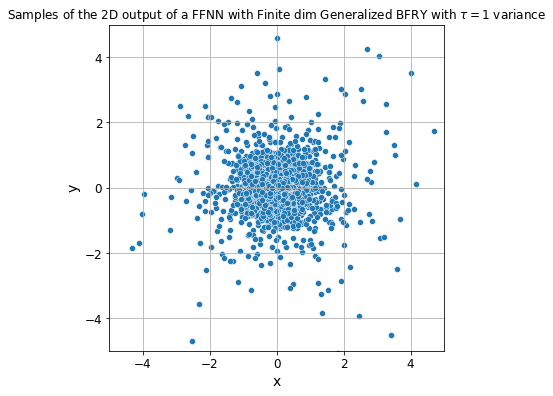

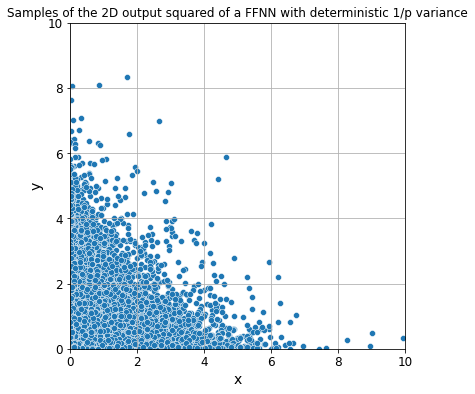

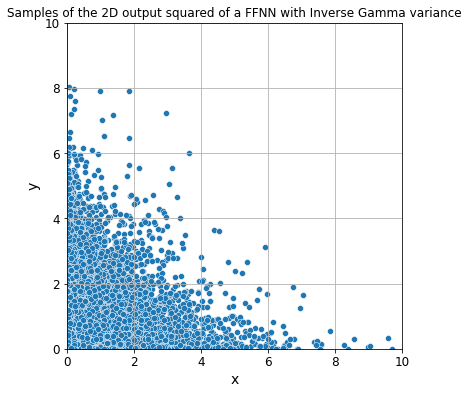

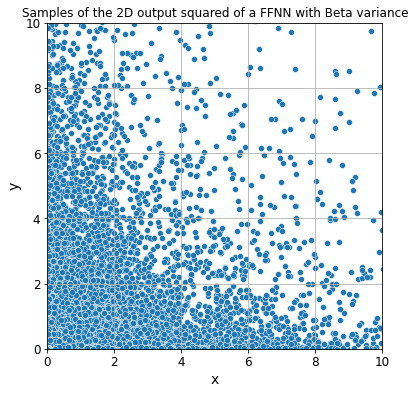

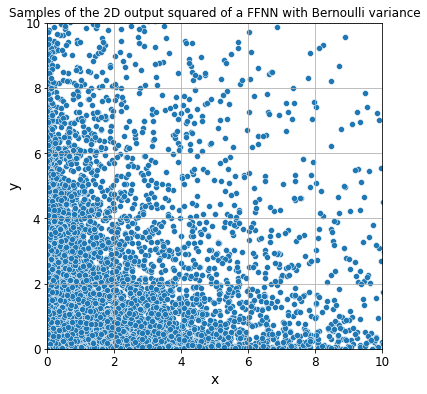

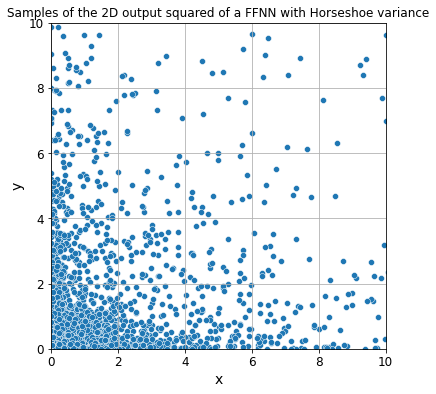

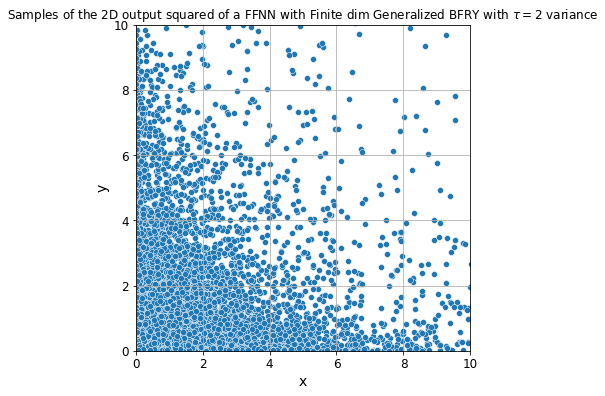

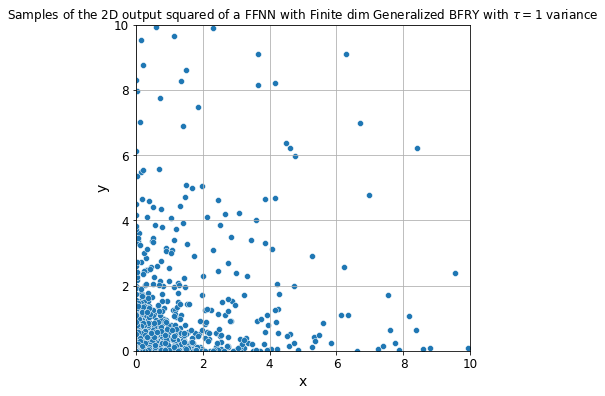

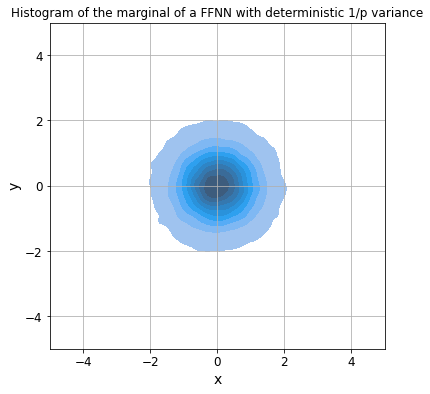

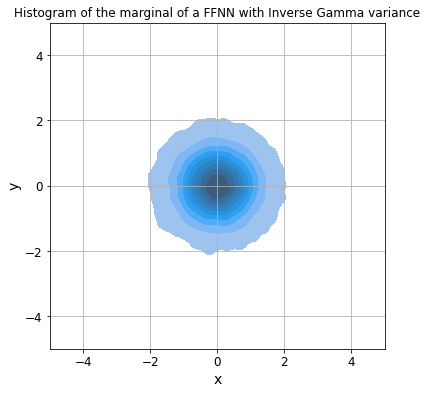

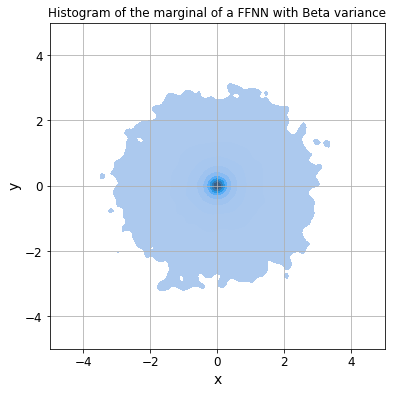

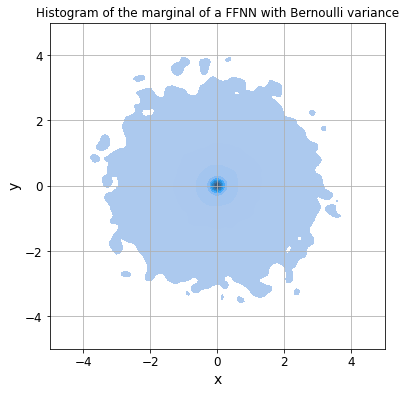

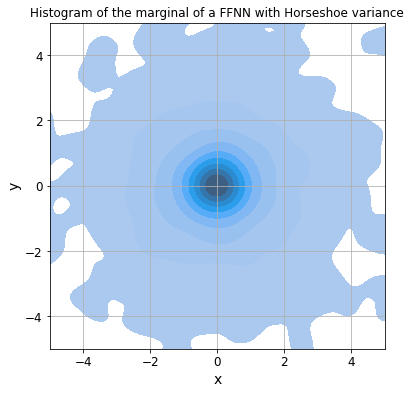

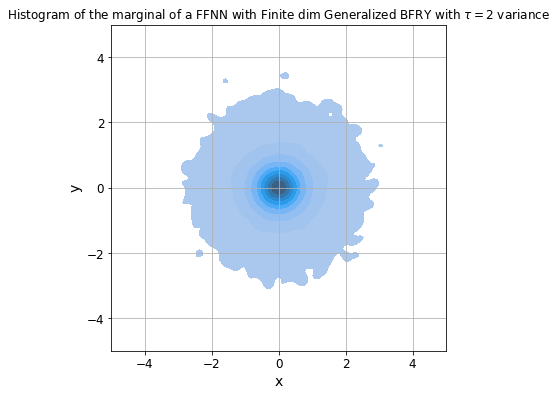

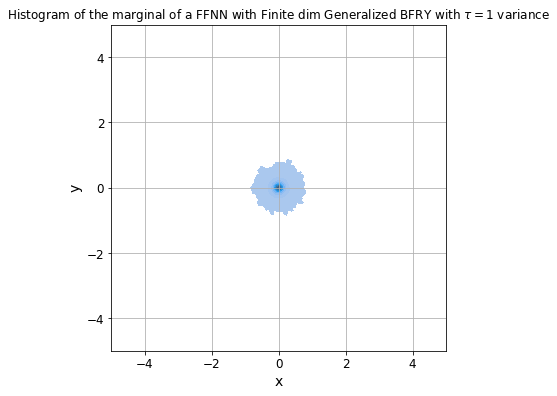

In [5]:
p=2000

# Visualize output in 2D
for dist in dist_list:
    
    samples_ = samples[p][dist]
    samples_ = samples_[np.sum(samples_**2, axis=1) < 50, :]
    
    df = pd.DataFrame({'x': samples_[:, 0], 'y': samples_[:, 1]})
    
    plt.figure(figsize=(6,6))
    plt.title("Samples of the 2D output of a FFNN with {} variance".format(dist_name[dist]))
    plt.xlim(-5,5)
    plt.ylim(-5,5)
    sns.scatterplot(data=df, x='x', y='y')
    plt.grid()
    plt.savefig('plots/samples_{}_variance.jpg'.format(dist), dpi=150)
    
for dist in dist_list:
    
    samples_ = samples[p][dist]
    samples_ = samples_[np.sum(samples_**2, axis=1) < 50, :]
    
    df = pd.DataFrame({'x': samples_[:, 0]**2, 'y': samples_[:, 1]**2})
    
    plt.figure(figsize=(6,6))
    plt.title("Samples of the 2D output squared of a FFNN with {} variance".format(dist_name[dist]))
    plt.xlim(0,10)
    plt.ylim(0,10)
    sns.scatterplot(data=df, x='x', y='y')
    plt.grid()
    plt.savefig('plots/samples_square_{}_variance.jpg'.format(dist), dpi=150)
    
    
for dist in dist_list:  
    samples_ = samples[p][dist]
    samples_ = samples_[np.sum(samples_**2, axis=1) < 50, :]    
    
    df = pd.DataFrame({'x': samples_[:, 0], 'y': samples_[:, 1]})
    
    plt.figure(figsize=(6,6))
    plt.title("Histogram of the marginal of a FFNN with {} variance".format(dist_name[dist]))
    plt.xlim(-5,5)
    plt.ylim(-5,5)
    if dist in ['iid', 'invgamma']:
        bins = 15 
    elif dist == 'bernoulli':
        bins = 10 
    else:
        bins = 50
    #sns.histplot(data=df, x='x', y="y", stat='density', bins=2*bins, kde=True, thresh=0.002)
    sns.kdeplot(data=df, x='x', y="y", thresh=0.02, fill=True)
    #sns.jointplot(data=df, x="x", y="y", kind="hist", bins=100)
    plt.grid()
    plt.savefig('plots/hist_{}_variance.jpg'.format(dist), dpi=150)
    
    

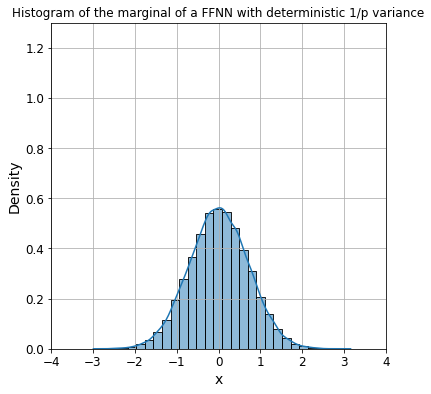

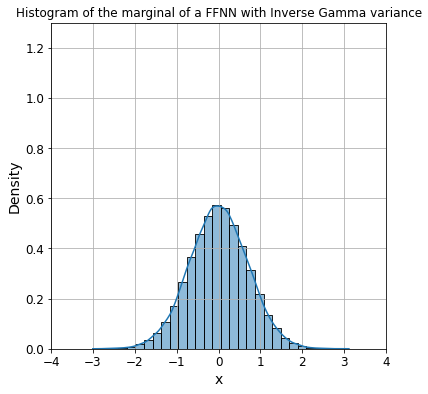

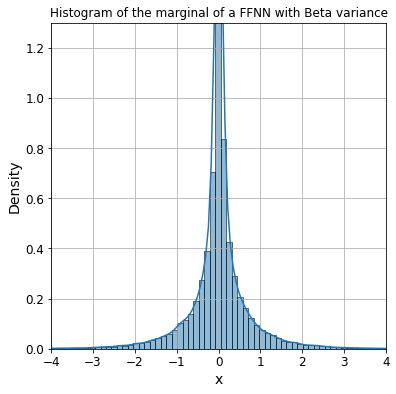

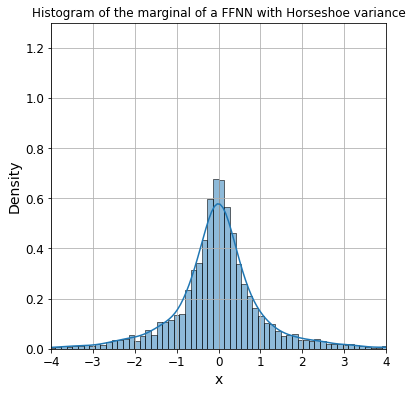

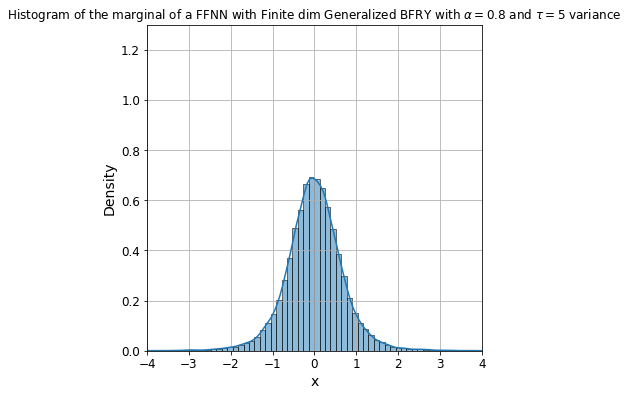

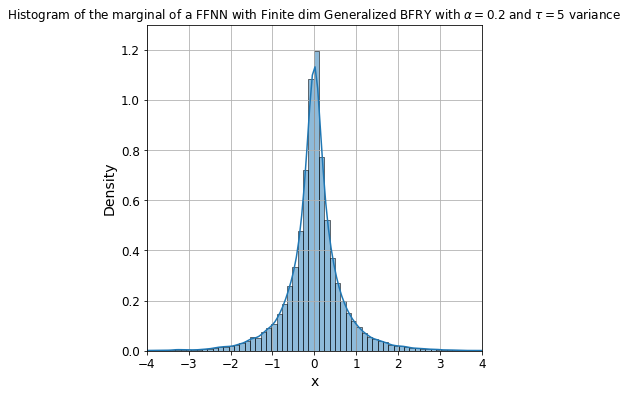

In [16]:
# Visualise output in 1D

# Load samples
samples = np.load('samples_shallow_large.npy', allow_pickle=True).item()
samples_gbfry = np.load('samples_shallow_large_gbfry.npy', allow_pickle=True).item()

samples[2000].update(samples_gbfry[2000])

dist_list = ['iid', 'invgamma', 'beta', 'horseshoe', 'gbfry_heavy_light', 'gbfry_light_light']
dist_name = {
    'iid': 'deterministic 1/p',
    'invgamma': 'Inverse Gamma',
    'beta': 'Beta',
    'bernoulli': 'Bernoulli',
    'horseshoe': "Horseshoe",
    'gbfry': r'Finite dim Generalized BFRY with $\tau=2$',
    'gbfry_heavy': r'Finite dim Generalized BFRY with $\tau=1$',
    'gbfry_heavy_light': r'Finite dim Generalized BFRY with $\alpha=0.8$ and $\tau=5$',
    'gbfry_light_light': r'Finite dim Generalized BFRY with $\alpha=0.2$ and $\tau=5$',
}

# Plot histogram
p = 2000
for dist in dist_list:  
    samples_ = samples[p][dist]
    samples_ = samples_[np.sum(samples_**2, axis=1) < 50, :]    
    
    df = pd.DataFrame({'x': samples_[:, 0], 'y': samples_[:, 1]})
    
    plt.figure(figsize=(6,6))
    plt.title("Histogram of the marginal of a FFNN with {} variance".format(dist_name[dist]))
    plt.xlim(-4,4)
    plt.ylim(0,1.3)
    if dist in ['iid', 'invgamma']:
        bins = 15 
    elif dist == 'bernoulli':
        bins = 10 
    else:
        bins = 50
    sns.histplot(data=df, x='x', stat='density', bins=2*bins, kde=True, thresh=0.002)
    #sns.kdeplot(data=df, x='x', y="y", thresh=0.02, fill=True)
    #sns.jointplot(data=df, x="x", y="y", kind="hist", bins=100)
    plt.grid()
    #plt.savefig('plots/hist_{}_variance.jpg'.format(dist), dpi=150)


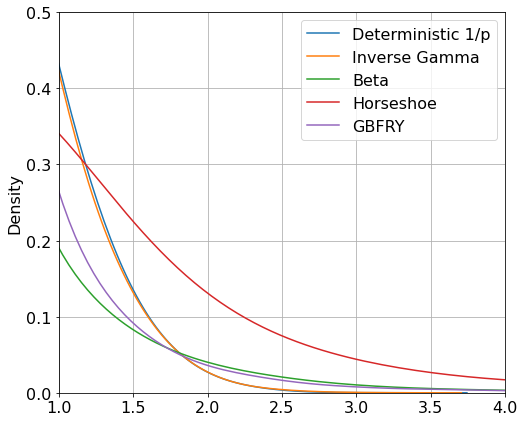

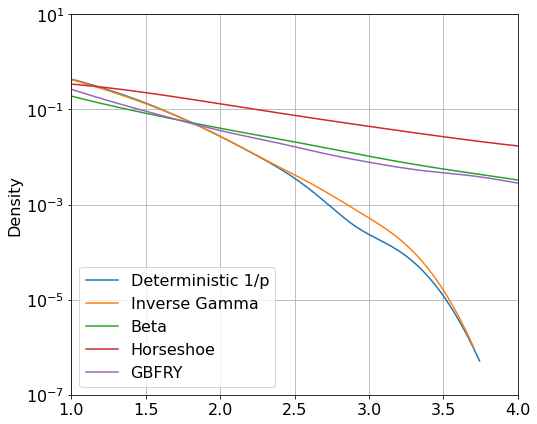

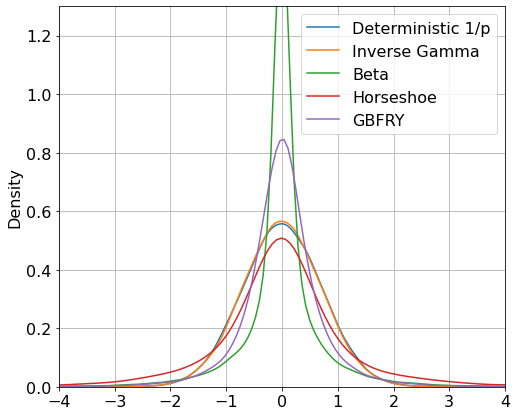

In [9]:
# Visualise output in 1D all in one plot
p = 2000
# Load samples
samples = np.load('samples_shallow_large.npy', allow_pickle=True).item()
samples_gbfry = np.load('samples_shallow_large_gbfry.npy', allow_pickle=True).item()

samples[p].update(samples_gbfry[p])

dist_list = ['iid', 'invgamma', 'beta', 'horseshoe', 'gbfry_heavy_light', 'gbfry_light_light']
dist_list = ['iid', 'invgamma', 'beta', 'horseshoe', 'gbfry']
dist_name = {
    'iid': 'Deterministic 1/p',
    'invgamma': 'Inverse Gamma',
    'beta': 'Beta',
    'bernoulli': 'Bernoulli',
    'horseshoe': "Horseshoe",
    #'gbfry': r'GBFRY $\alpha=0.5$ and $\tau=2$',
    'gbfry': r'GBFRY',
    'gbfry_heavy': r'Finite dim Generalized BFRY with $\tau=1$',
    'gbfry_heavy_light': r'GBFRY $\alpha=0.8$ and $\tau=5$',
    'gbfry_light_light': r'GBFRY $\alpha=0.2$ and $\tau=5$',
}

plt.figure(figsize=(8,7))
for dist in dist_list:  
    samples_ = samples[p][dist]
    samples_ = samples_[np.sum(samples_**2, axis=1) < 50, :]    
    label = dist_name[dist]
    sns.kdeplot(np.abs(samples_[:, 0]), label=label, bw_adjust=4.)
    if dist in ['iid', 'invgamma']:
        bins = 15 
    elif dist == 'bernoulli':
        bins = 10 
    else:
        bins = 50
    

#sns.kdeplot(data=df, x="Value", hue="variance", common_norm=False, bw_adjust=1.5, legend=True)
#plt.title("Histogram of the marginal of a FFNN")
plt.xlim(1., 4)
plt.ylim(0, .5)
#plt.yscale('log')
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(8,7))
for dist in dist_list:  
    samples_ = samples[p][dist]
    samples_ = samples_[np.sum(samples_**2, axis=1) < 50, :]    
    label = dist_name[dist]
    sns.kdeplot(np.abs(samples_[:, 0]), label=label, bw_adjust=4.)
    if dist in ['iid', 'invgamma']:
        bins = 15 
    elif dist == 'bernoulli':
        bins = 10 
    else:
        bins = 50
    

#sns.kdeplot(data=df, x="Value", hue="variance", common_norm=False, bw_adjust=1.5, legend=True)
#plt.title("Histogram of the marginal of a FFNN")
plt.xlim(1., 4)
plt.ylim(1e-7, 10)
plt.yscale('log')
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(8,7))
for dist in dist_list:  
    samples_ = samples[p][dist]
    samples_ = samples_[np.sum(samples_**2, axis=1) < 50, :]    
    label = dist_name[dist]
    sns.kdeplot(samples_[:, 0], label=label, bw_adjust=1.5)
    if dist in ['iid', 'invgamma']:
        bins = 15 
    elif dist == 'bernoulli':
        bins = 10 
    else:
        bins = 50
    

#sns.kdeplot(data=df, x="Value", hue="variance", common_norm=False, bw_adjust=1.5, legend=True)
#plt.title("Histogram of the marginal of a FFNN")
plt.xlim(-4,4)
plt.ylim(0,1.3)
plt.grid()
plt.legend()
plt.show()

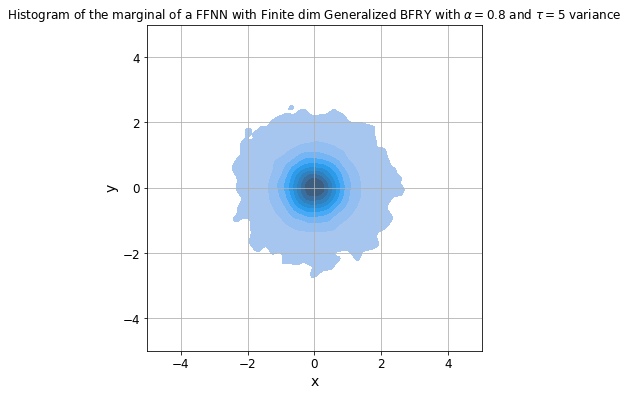

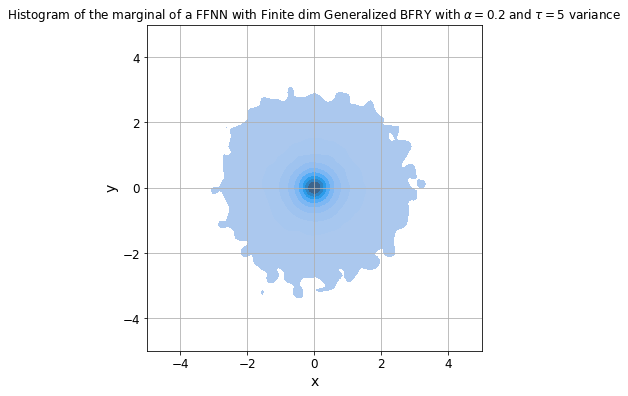

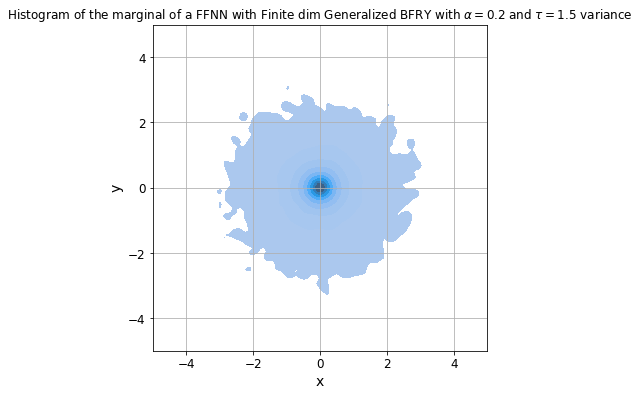

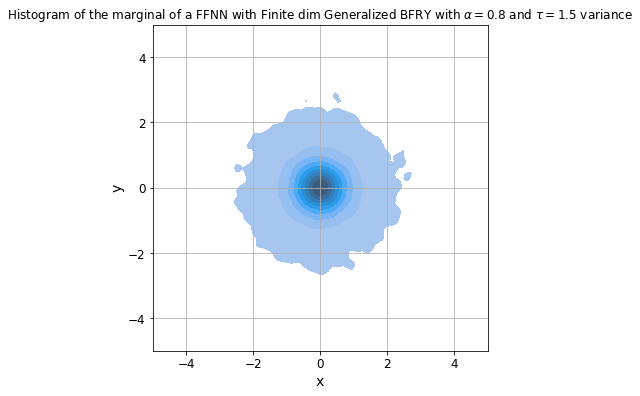

In [19]:
# GBFRY
dist_list = ['gbfry_heavy_light', 'gbfry_light_light', 'gbfry_light_heavy', 'gbfry_heavy_heavy']

dist_name = {
    'gbfry_heavy_light': r'Finite dim Generalized BFRY with $\alpha=0.8$ and $\tau=5$',
    'gbfry_heavy_heavy': r'Finite dim Generalized BFRY with $\alpha=0.8$ and $\tau=1.5$',
    'gbfry_light_light': r'Finite dim Generalized BFRY with $\alpha=0.2$ and $\tau=5$',
    'gbfry_light_heavy': r'Finite dim Generalized BFRY with $\alpha=0.2$ and $\tau=1.5$',
}

# Load samples
samples = np.load('samples_shallow_large_gbfry.npy', allow_pickle=True).item()

p=2000
for dist in dist_list:  
    samples_ = samples[p][dist]
    samples_ = samples_[np.sum(samples_**2, axis=1) < 50, :]    
    
    df = pd.DataFrame({'x': samples_[:, 0], 'y': samples_[:, 1]})
    
    plt.figure(figsize=(6,6))
    plt.title("Histogram of the marginal of a FFNN with {} variance".format(dist_name[dist]))
    plt.xlim(-5,5)
    plt.ylim(-5,5)
    if dist in ['iid', 'invgamma']:
        bins = 15 
    elif dist == 'bernoulli':
        bins = 10 
    else:
        bins = 50
    #sns.histplot(data=df, x='x', y="y", stat='density', bins=2*bins, kde=True, thresh=0.002)
    sns.kdeplot(data=df, x='x', y="y", thresh=0.02, fill=True)
    #sns.jointplot(data=df, x="x", y="y", kind="hist", bins=100)
    plt.grid()
    plt.savefig('plots/hist_{}_variance.jpg'.format(dist), dpi=150)

## Dependency between the output dimensions

In [31]:
from sklearn.feature_selection import mutual_info_classif
from itertools import product

p_list = list(samples.keys())
num_classes = 50
bins = np.linspace(0, 5, num_classes)

mutual_info = dict()
correlations = dict()

for t, dist in enumerate(dist_list):
    #print("Distribution {} / {}".format(t + 1, len(dist_list)))
    mutual_info[dist] = np.zeros(len(p_list))
    correlations[dist] = np.zeros(len(p_list))
    
    for t_p, p in tqdm(enumerate(p_list)):
        x_bins = np.digitize(np.abs(samples[p][dist][:, 0]), bins)
        y_bins = np.digitize(np.abs(samples[p][dist][:, 1]), bins)
        
        p_xy = np.zeros((num_classes+1, num_classes+1))
        for i, j in zip(x_bins, y_bins):
            p_xy[i, j] += 1 
        p_xy /= len(x_bins)
        
        p_x = np.sum(p_xy, axis=1).flatten()
        p_y = np.sum(p_xy, axis=0).flatten()
        
        mutual_info[dist][t_p] = np.sum([
            p_xy[i, j]*(np.log(p_xy[i, j]) - np.log(p_x[i]) - np.log(p_y[j]))
            for i,j in product(range(num_classes+1), range(num_classes+1)) if p_xy[i,j] > 0
        ])
        
        correlations[dist][t_p] = ss.pearsonr(samples[p][dist][:, 0]**2, samples[p][dist][:, 1]**2)[0]


4it [00:00, 12.24it/s]
4it [00:00, 16.38it/s]
4it [00:00, 15.41it/s]
4it [00:00, 15.47it/s]
4it [00:00, 74.70it/s]
4it [00:00, 16.01it/s]


In [12]:
mutual_info_table = pd.DataFrame({
    'width': p_list,
    **mutual_info
})

mutual_info_table

,width,iid,invgamma,beta,bernoulli,horseshoe,gbfry
0,100,0.049943,0.064989,0.331561,0.495924,0.404572,0.149371
1,500,0.041557,0.051599,0.351971,0.496855,0.402687,0.178815
2,1000,0.048847,0.054654,0.345903,0.503778,0.394330,0.153316
3,2000,0.049465,0.052032,0.326711,0.504725,0.384161,0.162875


In [32]:
correlations_table = pd.DataFrame({
    'width': p_list,
    **correlations
})

correlations_table

,width,iid,invgamma,beta,bernoulli,horseshoe,gbfry
0,100,0.019994,0.113897,0.320444,0.281985,0.691159,0.333250
1,500,0.005390,0.028584,0.281498,0.316974,0.434425,0.219763
2,1000,0.005495,0.015217,0.279571,0.324934,0.995462,0.316032
3,2000,0.001844,0.004522,0.297515,0.294170,0.253737,0.235673


## Convergence to the theoretical infinite width limit

In [14]:
def sample_normal_gamma(size, alpha=1/4, beta=1/2):
    return np.sqrt(ss.gamma(alpha, scale=1/beta).rvs(size))*ss.norm().rvs(size)

def sample_stable(size, alpha=1):
    return np.sqrt(ss.levy_stable(alpha, 0).rvs(size))*ss.norm().rvs(size)

def sample_normal_gamma_poisson(size):
    N = ss.poisson(1/2).rvs(size)
    lambdas = np.array([0 if n==0 else ss.gamma(n/2, scale=2).rvs() for n in N])
    return np.sqrt(lambdas)*ss.norm().rvs(size)


<ipython-input-14-df6d3f41541e>:5: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(ss.levy_stable(alpha, 0).rvs(size))*ss.norm().rvs(size)


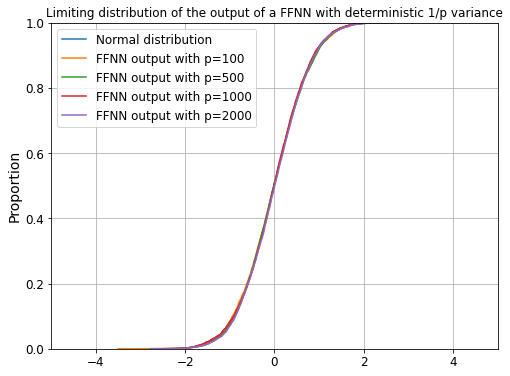

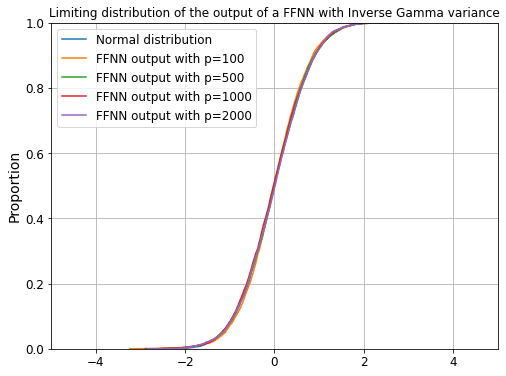

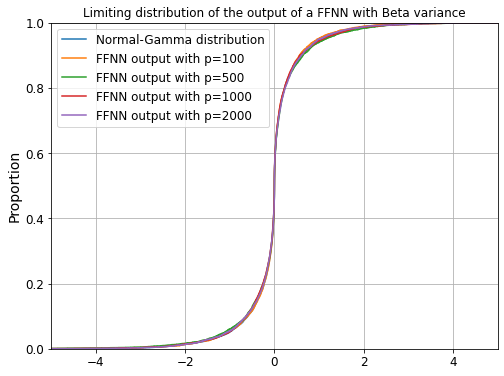

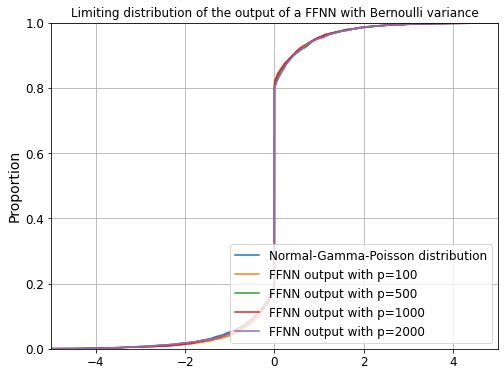

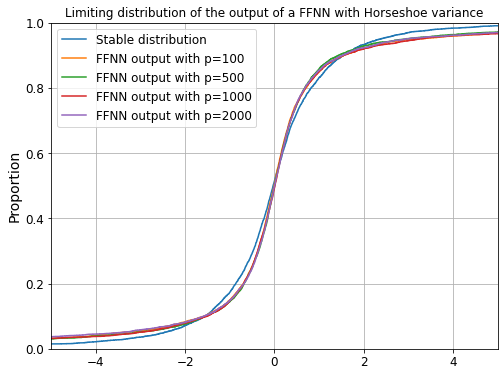

In [15]:
p_list = list(samples.keys())
dist_list = ['iid', 'invgamma', 'beta', 'bernoulli', 'horseshoe']
             
dist_lim_rvs = {
    'iid': lambda size: np.sqrt(0.5)*ss.norm().rvs(size),
    'invgamma': lambda size: np.sqrt(0.5)*ss.norm().rvs(size),
    'horseshoe': sample_stable,
    'beta': sample_normal_gamma,
    'bernoulli': sample_normal_gamma_poisson
}

dist_lim_name = {
    'iid': 'Normal distribution',
    'invgamma': 'Normal distribution',
    'horseshoe': 'Stable distribution',
    'beta': 'Normal-Gamma distribution',
    'bernoulli': 'Normal-Gamma-Poisson distribution'   
}

for dist in dist_list:
    plt.figure(figsize=(8,6))
    sns.ecdfplot(dist_lim_rvs[dist](10000), stat='proportion', label=dist_lim_name[dist])
    for p in p_list:
        sns.ecdfplot(samples[p][dist][:,0], label='FFNN output with p={}'.format(p))
    plt.xlim(-5,5)
    plt.title('Limiting distribution of the output of a FFNN with {} variance'.format(dist_name[dist]))
    plt.legend()
    plt.grid()

## Non vanishing weights

Visualize the distribution of the largest wieght as $p \rightarrow +\infty$ 

In [13]:
n_samples = 2000
p_list = [200, 400, 600, 800, 1000]
p_list = [250, 500, 750, 1000]

p_col = np.repeat(p_list, n_samples)
p_col


max_w_horseshoe = []
for p in tqdm(p_col):
    max_w_horseshoe += [np.max(lam_sampler(p, 'horseshoe')(p).T*np.random.normal(size=(p,p)))**2]
    
# Generalized BFRY variance
max_w_gbfry = []
for p in tqdm(p_col):
    max_w_gbfry += [np.max(lam_sampler(p, 'gbfry')(p).T*np.random.normal(size=(p,p)))**2]

# Generalized Beta variance
max_w_beta = []
for p in tqdm(p_col):
    max_w_beta += [np.max(lam_sampler(p, 'beta')(p).T*np.random.normal(size=(p,p)))**2]
    
# Deterministic variance
max_w_det = []
for p in tqdm(p_col):
    max_w_det += [np.max(lam_sampler(p, 'iid')(p).T*np.random.normal(size=(p,p)))**2]



100%|██████████| 8000/8000 [02:51<00:00, 46.55it/s] 


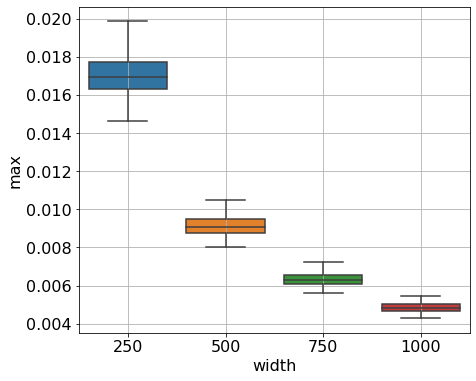

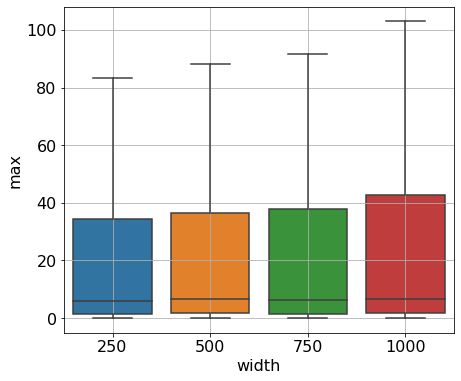

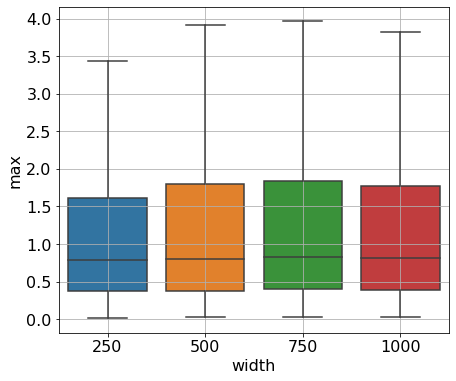

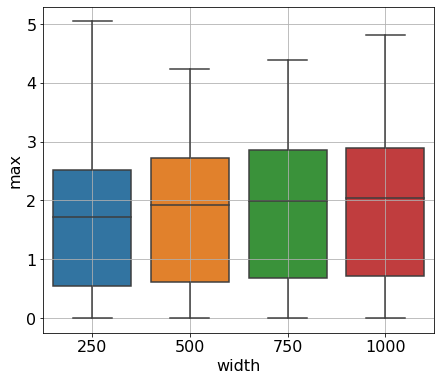

In [21]:
deterministic_pd = pd.DataFrame({
    'width': p_col,
    'max': np.sqrt(max_w_det)
})

gbfry_pd = pd.DataFrame({
    'width': p_col,
    'max': np.sqrt(max_w_gbfry)    
})

beta_pd = pd.DataFrame({
    'width': p_col,
    'max': np.sqrt(max_w_beta)    
})

horseshoe_pd = pd.DataFrame({
    'width': p_col,
    'max': np.sqrt(max_w_horseshoe)    
})

plt.figure(figsize=(7,6))
sns.boxplot(data=deterministic_pd, x='width', y='max', showfliers = False)
plt.title(r"Distribution of $\max\ |W_{ij}|$ for $p \rightarrow +\infty$ with deterministic 1/p variance")
plt.grid()

plt.figure(figsize=(7,6))
sns.boxplot(data=horseshoe_pd, x='width', y='max', showfliers = False)
plt.title(r"Distribution of $\max\ |W_{ij}|$ for $p \rightarrow +\infty$ with Horseshoe variance")
plt.grid()


plt.figure(figsize=(7,6))
sns.boxplot(data=gbfry_pd, x='width', y='max', showfliers = False)
plt.title(r"Distribution of $\max\ |W_{ij}|$ for $p \rightarrow +\infty$ with Generalized BFRY variance")
plt.grid()

plt.figure(figsize=(7,6))
sns.boxplot(data=beta_pd, x='width', y='max', showfliers = False)
plt.title(r"Distribution of $\max\ |W_{ij}|$ for $p \rightarrow +\infty$ with Beta variance")
plt.grid()

## Truncation error at initialization

In [10]:
input_size = 1
num_hidden = 1
p = 2000 
output_size = 1

kappa = 1.

eps_list = np.logspace(-5, 0, 10)
n_runs = 1000
x = torch.tensor([1.])

alpha_list = [0.1, 0.3, 0.5]

res = {}

for alpha in alpha_list:
    _eps = []
    _run = []
    _error = []
    _f_x = []
    for eps in tqdm(eps_list):
        for r in range(n_runs):
            simple_net = BayesFFNN(input_size, num_hidden, p, output_size)
            simple_net.init_weights(GBFRYInit(alpha=alpha, tau=5), kappa=kappa, sigma_b=0)
            #simple_net.init_weights(GGPInit(alpha=alpha), kappa=kappa, sigma_b=0)
            #simple_net.init_weights(StableInit(alpha=alpha, mu=1), kappa=kappa, sigma_b=0)
            
            simple_net.eval()
            f_x = simple_net(x).detach().numpy()[0]
            simple_net.truncate(np.sqrt(eps))
            f_eps_x = simple_net(x).detach().numpy()[0]

            _eps.append(eps)
            _run.append(r)
            _error.append((f_x-f_eps_x)**2)
            _f_x.append(f_x)
            

    res[alpha] = pd.DataFrame.from_dict({
        "eps": _eps,
        "run": _run,
        "error": _error,
        "f_x": _f_x,
    })
    

100%|██████████| 10/10 [1:09:35<00:00, 417.57s/it]


For alpha = 0.1, the empirical slope is 0.9197283027591179
For alpha = 0.3, the empirical slope is 0.6914097606978445
For alpha = 0.5, the empirical slope is 0.4922201372158013


Text(0.5, 1.0, 'Truncation error')

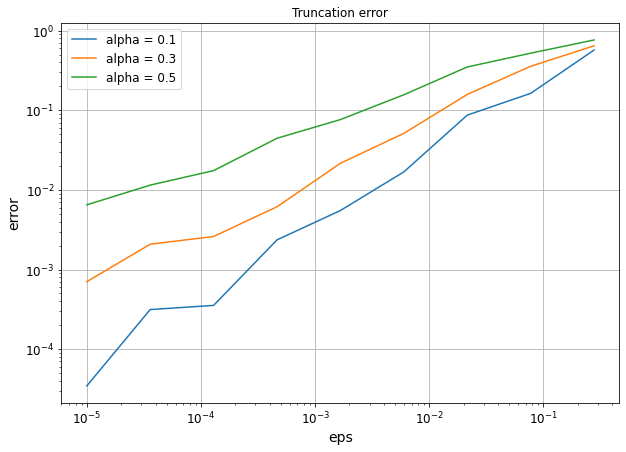

In [15]:
import seaborn as sns

plt.figure(figsize=(10,7))
for alpha in alpha_list:
    res_ = res[alpha][res[alpha]["eps"]<5e-1]
    df = res_.groupby("eps").mean()['error'] / res_.groupby("eps").var()["f_x"]
    df.plot(logx=True, logy=True, label="alpha = {}".format(alpha))
    #res[alpha].groupby("eps").std()["f_x"]
    #res[alpha].plot.scatter(x='eps', y='error', logx=True, logy=True, ax=ax)
    #df = res[alpha].groupby("eps").mean()['error']
    x_ = np.log(df.index.values)
    mean_x_ = np.mean(x_)
    y_ = np.log(df.values)
    mean_y_ = np.mean(y_)
    slope = np.sum((x_-mean_x_)*(y_-mean_y_))/np.sum((x_-mean_x_)**2)
    print("For alpha = {}, the empirical slope is {}".format(alpha, slope))

plt.grid()
plt.ylabel("error")
plt.legend()
plt.title("Truncation error")

# WIP (to delete)

In [31]:
input_size = 1
hidden_list = [0, 1, 2, 3, 4, 5, 6]

p = 1000 
output_size = 1

kappa = 1.

eps_list = np.logspace(-5., 0, 10)
n_runs = 500
x = torch.tensor([1.])

alpha = 0.2

res_h = {}

eps_list = [10**(-3), 10**(-4), 10**(-5), 10**(-6)]
#eps_list = [10**(-5)]
res_h = pd.DataFrame({r'$\ell$': [], 'error': [], 'eps': []})

for eps in eps_list:
    for num_hidden in tqdm(hidden_list):
        _eps = []
        _run = []
        _error = []
        _f_x = []
        for r in range(n_runs):
            simple_net = BayesFFNN(input_size, num_hidden, p, output_size)
            simple_net.init_weights(GBFRYInit(alpha=alpha, tau=5, mu=2), kappa=kappa, sigma_b=0)
            #simple_net.init_weights(GGPInit(alpha=alpha), kappa=kappa, sigma_b=0)
            #simple_net.init_weights(StableInit(alpha=alpha, mu=1), kappa=kappa, sigma_b=0)

            simple_net.eval()
            f_x = simple_net(x).detach().numpy()[0]
            simple_net.truncate(np.sqrt(eps))
            f_eps_x = simple_net(x).detach().numpy()[0]

            _eps.append(eps)
            _run.append(r)
            _error.append((f_x-f_eps_x)**2)
            _f_x.append(f_x)


        res_h = res_h.append(pd.DataFrame.from_dict({
            'eps': [eps]*n_runs,
            r'$\ell$': [int(num_hidden+1)]*n_runs,
            "error": _error / np.var(_f_x),
        }), ignore_index=True)


100%|██████████| 7/7 [17:56<00:00, 153.83s/it]


<AxesSubplot:>

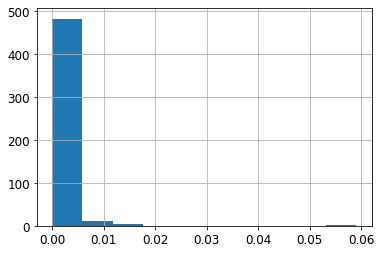

In [50]:
res_h[(res_h[r'$\ell$']==2).values*(res_h['eps']==1e-4).values]['error'].hist()

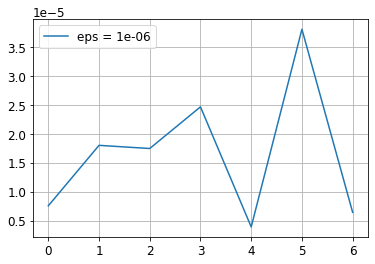

In [64]:
mean_res_h = res_h.groupby([r'$\ell$', 'eps']).agg(lambda x: x.clip(0, x.quantile(0.95)).mean())
#mean_res_h = res_h.groupby([r'$\ell$', 'eps']).mean()
eps_list_ = [10**(-5)]
eps_list_ = [10**(-6)]#, 10**(-4), 10**(-5), 10**(-6)]
for eps in eps_list_:
    idx = mean_res_h.index.get_level_values(1)==eps
    plt.plot(hidden_list, mean_res_h.iloc[idx].values, label="eps = {}".format(eps))
#mean_res_h
plt.grid()
plt.legend()

With 1 hidden layers, the empirical slope is 0.643435585464223
With 2 hidden layers, the empirical slope is 0.6075366384618154
With 3 hidden layers, the empirical slope is 0.6017510589491262
With 5 hidden layers, the empirical slope is 0.5529109082956933
With 7 hidden layers, the empirical slope is 0.3699616693296579


Text(0.5, 1.0, 'Truncation error')

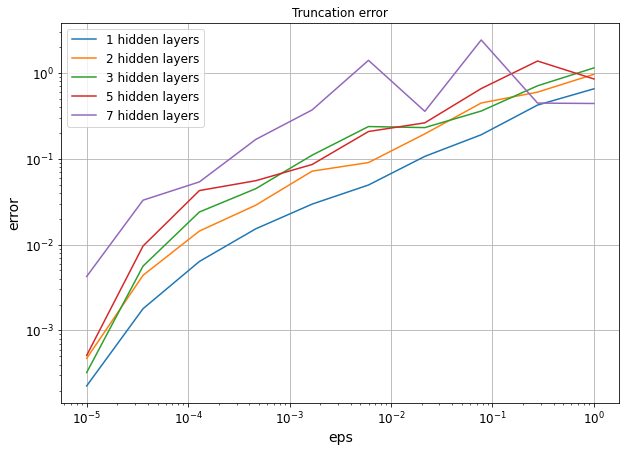

In [88]:
import seaborn as sns

plt.figure(figsize=(10,7))
for num_hidden in hidden_list:
    (res_h[num_hidden].groupby("eps").mean()['error'] / res_h[num_hidden].groupby("eps").std()["f_x"]).plot(logx=True, logy=True, label="{} hidden layers".format(num_hidden+1))
    df = res_h[num_hidden].groupby("eps").mean()['error']
    x_ = np.log(df.index.values)
    mean_x_ = np.mean(x_)
    y_ = np.log(df.values)
    mean_y_ = np.mean(y_)
    slope = np.sum((x_-mean_x_)*(y_-mean_y_))/np.sum((x_-mean_x_)**2)
    print("With {} hidden layers, the empirical slope is {}".format(num_hidden+1, slope))

plt.grid()
plt.ylabel("error")
plt.legend()
plt.title("Truncation error")

# Take C=2 = int x rho(x) dx

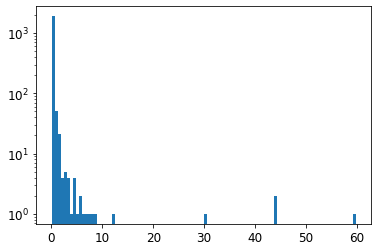

In [30]:
n_samples = 1
p = 2000
alpha = 0.9

#plt.hist(sample_finite_Stable(alpha=0.5, shape=(n_samples, p)).numpy().flatten(), log=True, bins=100);
plt.hist(StableInit(alpha=alpha, mu=10**(2/alpha)).rvs((n_samples, p)).numpy().flatten(), log=True, bins=100);
#plt.hist(HorseshoeInit(p=p).rvs((n_samples, p)).numpy().flatten(), log=True, bins=100);

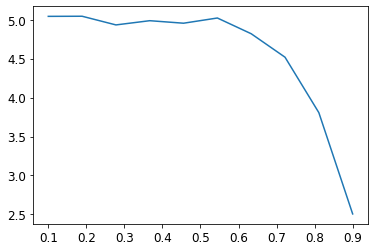

In [69]:
def sample_finite_GBFRY(alpha, tau, mu=1., shape=(1, 5)):
    # shape[0]: Number of samples
    # shape[1]: Number of atoms to use for the finite
    #           dimensional approximation
    tau = np.maximum(tau, 1.01)

    if np.isscalar(shape):
        out_features = 1
        in_features = shape
    else:
        out_features = shape[0]
        in_features = shape[1]

    c = mu * (tau - 1) / (tau - alpha)

    eta = 1 #/ math.gamma(1 - alpha)

    s_mat = Uniform(torch.zeros(shape),
                    torch.ones(shape)
                    ).sample()

    log_tl = np.log(alpha * in_features * tau / eta / (tau - alpha)) / alpha
    #log_tl = np.log(alpha * in_features * tau / eta ) / alpha
    
    tens = torch.ones((2, out_features, in_features))
    tens[0, :, :] = torch.log(s_mat)
    tens[1, :, :] = torch.log(1 - s_mat) + alpha * logsumexp((log_tl, 0))
    log_w = -1 / alpha * torch.logsumexp(tens, axis=0)
    gamma_mat = Gamma(concentration=(1-alpha)*torch.ones(shape), rate=torch.ones(shape)).sample()

    pareto_mat = Pareto(scale=torch.ones(shape), alpha=tau * torch.ones(shape)).sample()

    #return (c * torch.exp(log_w) * pareto_mat).detach().numpy()
    return (c * torch.exp(log_w) * pareto_mat * gamma_mat).detach().numpy()

alpha_list = np.linspace(0.1, 0.9, 10)
means = []
for alpha in alpha_list:
    samples = sample_finite_GBFRY(alpha=alpha, tau=10, mu=5, shape=(5000, 500))
    means.append(np.mean(np.sum(samples, axis=1)))
    
plt.plot(alpha_list, means)

(array([984.,   6.,   3.,   1.,   1.,   2.,   1.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([1.81354305e-41, 2.66113501e-03, 5.32227001e-03, 7.98340502e-03,
        1.06445400e-02, 1.33056750e-02, 1.59668100e-02, 1.86279450e-02,
        2.12890801e-02, 2.39502151e-02, 2.66113501e-02, 2.92724851e-02,
        3.19336201e-02, 3.45947551e-02, 3.72558901e-02, 3.99170251e-02,
        4.25781601e-02, 4.5239

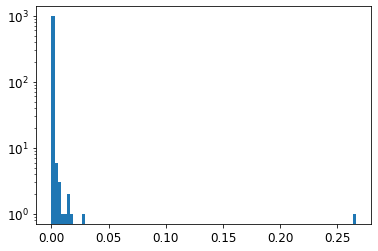

In [32]:
shape=(1000)
tau=5
alpha = 0.9

samples = sample_finite_GBFRY(alpha, tau, mu=1., shape=shape).flatten()
plt.hist(samples, log=True, bins=100)
#torch.distributions.Pareto(scale=torch.ones(shape), alpha=tau * torch.ones(shape)).sample().detach().max()

#Gamma(concentration=(1-alpha)*torch.ones(shape), rate=torch.ones(shape)).sample().mean()

In [1]:
import torch

import sys
sys.path.append("../")

from tqdm import tqdm
import numpy as np

import scipy.stats as ss


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from simulationmodel import *

from sampling_utils import *


SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

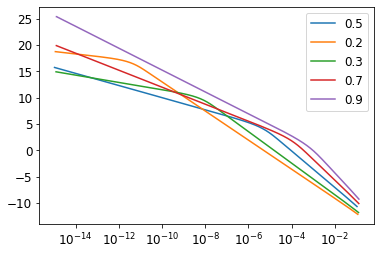

In [5]:
tau=10
alpha = 0.9

x_val = torch.tensor(np.geomspace(1e-15,1e-1,1000)).view(1,-1)
dist = GBFRYInit(tau=tau, alpha = 0.5)
y_val = dist.log_pdf(x_val).detach().numpy().flatten()
plt.plot(x_val.detach().numpy().flatten(), y_val, label="0.5")

dist = GBFRYInit(tau=tau, alpha = 0.2)
y_val = dist.log_pdf(x_val).detach().numpy().flatten()
plt.plot(x_val.detach().numpy().flatten(), y_val, label="0.2")

dist = GBFRYInit(tau=tau, alpha = 0.3)
y_val = dist.log_pdf(x_val).detach().numpy().flatten()
plt.plot(x_val.detach().numpy().flatten(), y_val, label="0.3")

dist = GBFRYInit(tau=tau, alpha = 0.7)
y_val = dist.log_pdf(x_val).detach().numpy().flatten()
plt.plot(x_val.detach().numpy().flatten(), y_val, label="0.7")

dist = GBFRYInit(tau=tau, alpha = 0.9)
y_val = dist.log_pdf(x_val).detach().numpy().flatten()
plt.plot(x_val.detach().numpy().flatten(), y_val, label="0.9")

plt.xscale('log')
plt.legend()